<a href="https://colab.research.google.com/github/yassenayman/task-3-for-sparks/blob/main/Copy_of_ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in **relation** to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization. **bold text**

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.
**bold text**
2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

**Task 1**

In [18]:
def data_exploration(df):
  #Number of rows and columns
  num_rows,num_columns=df.shape
  print("Number of rows is : ",num_rows ,"& Number of columns is : ",num_columns)
  print("------------------*****------------------------")
  # Determine the data types of each column
  print("Data types for each column :\n",df.dtypes)
  print("------------------*****------------------------")
  #missing values
  print("Missing Values: \n",df.isnull().sum())
data_exploration(df)

Number of rows is :  148654 & Number of columns is :  13
------------------*****------------------------
Data types for each column :
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
------------------*****------------------------
Missing Values: 
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


**Task 2**

In [19]:
def descriptive_statistics(df):
  mean_salary=df['TotalPayBenefits'].mean()
  median_salary=df['TotalPayBenefits'].median()
  mode_salary=df['TotalPayBenefits'].mode()[0]
  min_salary=df['TotalPayBenefits'].min()
  max_salary=df['TotalPayBenefits'].max()
  range = max_salary - min_salary
  std_salary = df['TotalPayBenefits'].std()
  print(" mean of salary= ", mean_salary, '\n', 'median of salary = ', median_salary, '\n', 'mode salary is : ', mode_salary)
  print( ' min salry = ', min_salary, '\n','max salary = ',max_salary,'\n','range of salaries = ',range,'\n','standard deviasion =',std_salary)
descriptive_statistics(df)

 mean of salary=  93692.55481056681 
 median of salary =  92404.09 
 mode salary is :  7959.18
 min salry =  -618.13 
 max salary =  567595.43 
 range of salaries =  568213.56 
 standard deviasion = 62793.533483237705


In [17]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**Task 3 **

In [5]:
#we will deal with missing values based on each column ans its nature
# so  in columns BasePay, OvertimePay, OtherPay , missing values aren't much so we will remove it
# but, in benefits we have 36163 nulls, so we can't remve it so we will impute this column
# As for notes and status these 2 columns aren't critical so we can drop these 2 columns
def cleaning(df):
  # Remove rows with missing values in BasePay, OvertimePay, OtherPay
  df.dropna(subset=['BasePay', 'OvertimePay', 'OtherPay'], inplace=True)

  # Impute missing values in Benefits with the mean

  df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

  # Drop Notes and Status columns
  df.drop(['Notes', 'Status'], axis=1, inplace=True)

**Task 4 **

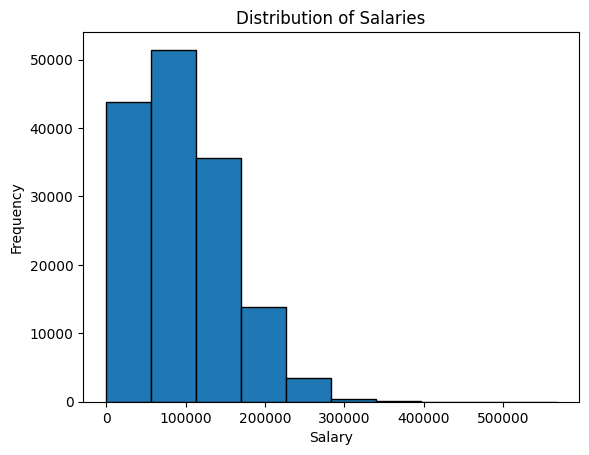

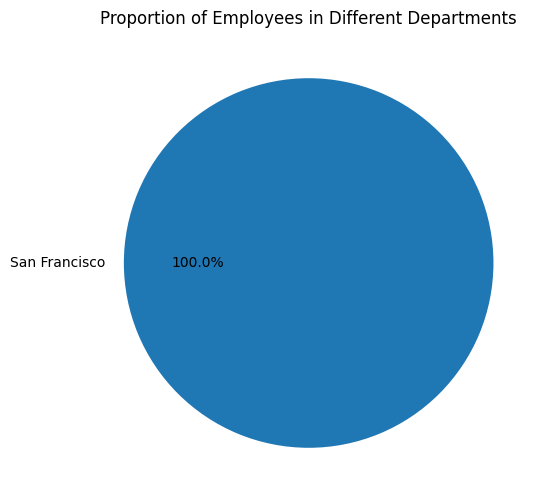

In [6]:
# Create a histogram of salaries
plt.hist(df['TotalPayBenefits'], bins=10, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

# Create a bar chart of department proportions
department_counts = df['Agency'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

**Task 5**

In [7]:
grouped_data = df.groupby(['JobTitle', 'Year']).agg({'BasePay': 'mean', 'TotalPay': 'mean'})

# Print the summary statistics for each group
print(grouped_data)

# Compare average salaries across different groups
average_salaries = df.groupby('JobTitle')['BasePay'].mean()
print(average_salaries)

                                                          BasePay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  43300.806506   
ACCOUNTANT                                     2011  46643.172000   
ACCOUNTANT INTERN                              2011  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  66374.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  52609.910000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  33174.840000   
                                               2014  32417.420000   
ZOO CURATOR                                    2011  43148.000000   

                                                         TotalPay  
JobTitle                          

**Task 6 **

Correlation between Total pay and over time pay:  0.5048588704522461


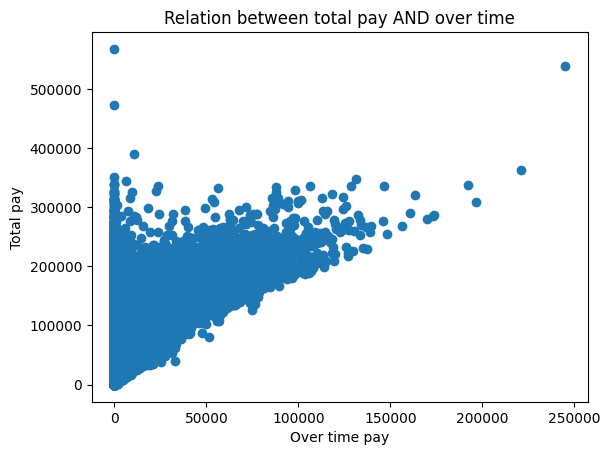

In [13]:
corr=df['TotalPay'].corr(df['OvertimePay'])
print("Correlation between Total pay and over time pay: ", corr)
plt.scatter(df['OvertimePay'],df['TotalPay'])
plt.xlabel('Over time pay')
plt.ylabel("Total pay")
plt.title("Relation between total pay AND over time")
plt.show()

**Task 7 **

In [20]:
"""
From Analysis wi find that All Employes located in san fransisco and over time and other pay influence in total pay
"""

'\nFrom Analysis wi find that All Employes located in san fransisco and over time and other pay influence in total pay \n'

# Good Luck!